In [1]:
import pandas as pd
import numpy as np
from minepy import MINE
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
rel_1=pd.read_csv("CLV_and_WUS.csv")
rel_2=pd.read_csv("Toc1_and_LHY.csv")
rel_3=pd.read_csv("VRN1_and_FLC.csv")

In [3]:
rel_1.describe()

,AT1G26600,AT2G17950
count,6289.000000,6289.000000
mean,4.576197,4.236053
std,0.495734,0.785422
min,3.656322,3.533070
25%,4.228452,3.889400
50%,4.495195,4.053088
75%,4.819925,4.276374
max,9.003310,11.843293


In [4]:
rel_2.describe()

,AT5G61380,AT1G01060
count,6289.000000,6289.000000
mean,8.219552,8.175002
std,1.010536,1.769929
min,5.060991,3.933622
25%,7.506168,6.702304
50%,8.307837,8.077747
75%,8.989752,9.532110
max,10.868501,12.637541


In [5]:
rel_3.describe()

,AT3G18990,AT5G10140
count,6289.000000,6289.000000
mean,8.073033,6.031057
std,0.684542,1.557808
min,4.104264,3.755013
25%,7.620223,4.842457
50%,8.097949,5.531772
75%,8.551039,6.818853
max,10.458180,11.466960


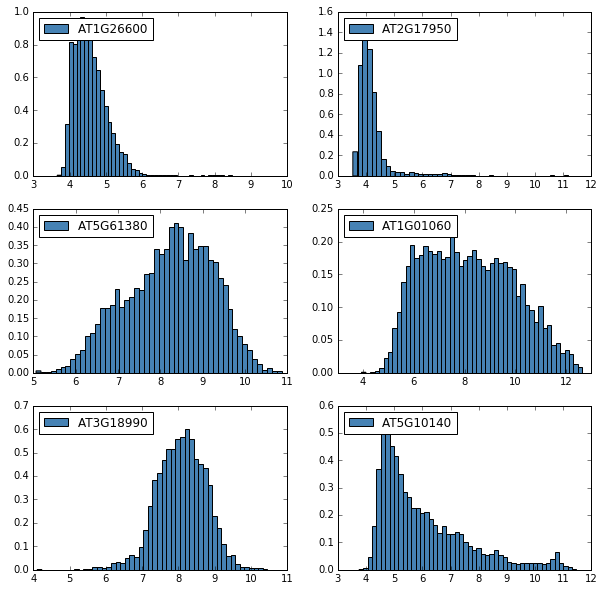

In [6]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
ax[0][0].hist(rel_1["AT1G26600"], bins=50, color='steelblue', normed=True)
ax[0][1].hist(rel_1["AT2G17950"], bins=50, color='steelblue', normed=True)
ax[1][0].hist(rel_2["AT5G61380"], bins=50, color='steelblue', normed=True)
ax[1][1].hist(rel_2["AT1G01060"], bins=50, color='steelblue', normed=True)
ax[2][0].hist(rel_3["AT3G18990"], bins=50, color='steelblue', normed=True)
ax[2][1].hist(rel_3["AT5G10140"], bins=50, color='steelblue', normed=True)
for row in ax:
    for col in row:
        col.legend(loc='upper left')
plt.show()

In [7]:
# def correlation(df):
#     mine = MINE(alpha=0.6, c=15, est="mic_approx")
#     mine.compute_score(df[:,0], df[:,1])
#     prsr=stats.pearsonr(df[:,0], df[:,1])
#     sprm=stats.spearmanr(df[:,0], df[:,1])
#     gene_1=df[:,0].values.reshape((6289,1))
#     gene_2=df[:,1].values.reshape((6289,1)).ravel()
#     mi=mutual_info_regression(gene_1,gene_2)
# return mine,prsr,sprm,mi

In [8]:
mine_1 = MINE(alpha=0.6, c=15, est="mic_approx")
mine_1.compute_score(rel_1["AT1G26600"], rel_1["AT2G17950"])
prsr_1=stats.pearsonr(rel_1["AT1G26600"], rel_1["AT2G17950"])
sprm_1=stats.spearmanr(rel_1["AT1G26600"], rel_1["AT2G17950"])
gene_1=rel_1["AT1G26600"].values.reshape((6289,1))
gene_2=rel_1["AT2G17950"].values.reshape((6289,1)).ravel()
mi_1=mutual_info_regression(gene_1,gene_2)

In [9]:
# kd_1=stats.kendalltau(rel_1["AT1G26600"], rel_1["AT2G17950"])
# kd_1

In [10]:
mine_2 = MINE(alpha=0.6, c=15, est="mic_approx")
mine_2.compute_score(rel_2["AT5G61380"], rel_2["AT1G01060"])
prsr_2=stats.pearsonr(rel_2["AT5G61380"], rel_2["AT1G01060"])
sprm_2=stats.spearmanr(rel_2["AT5G61380"], rel_2["AT1G01060"])
gene_3=rel_2["AT5G61380"].values.reshape((6289,1))
gene_4=rel_2["AT1G01060"].values.reshape((6289,1)).ravel()
mi_2=mutual_info_regression(gene_3,gene_4)

In [11]:
mine_3 = MINE(alpha=0.6, c=15, est="mic_approx")
mine_3.compute_score(rel_3["AT3G18990"], rel_3["AT5G10140"])
prsr_3=stats.pearsonr(rel_3["AT3G18990"], rel_3["AT5G10140"])
sprm_3=stats.spearmanr(rel_3["AT3G18990"], rel_3["AT5G10140"])
gene_5=rel_3["AT3G18990"].values.reshape((6289,1))
gene_6=rel_3["AT5G10140"].values.reshape((6289,1)).ravel()
mi_3=mutual_info_regression(gene_5,gene_6)

In [12]:
#mine_1.mic(),prsr_1[0],prsr_1[1],sprm_1[0],sprm_1[1],mi_1[0]

In [13]:
#mine_2.mic(),prsr_2[0],prsr_2[1],sprm_2[0],sprm_2[1],mi_2[0]

In [14]:
#mine_3.mic(),prsr_3[0],prsr_3[1],sprm_3[0],sprm_3[1],mi_3[0]

In [18]:
rel_results = pd.DataFrame(columns=('GEN1','GEN2','MIC','Pearson','Pearson-p','Spearman','Spearman-p','MI'))
rel_results.loc[0]=["AT1G26600","AT2G17950",mine_1.mic(),prsr_1[0],prsr_1[1],sprm_1[0],sprm_1[1],mi_1[0]]
rel_results.loc[1]=["AT5G61380","AT1G01060",mine_2.mic(),prsr_2[0],prsr_2[1],sprm_2[0],sprm_2[1],mi_2[0]]
rel_results.loc[2]=["AT3G18990","AT5G10140",mine_3.mic(),prsr_3[0],prsr_3[1],sprm_3[0],sprm_3[1],mi_3[0]]
rel_results=rel_results.round(4)
rel_results

,GEN1,GEN2,MIC,Pearson,Pearson-p,Spearman,Spearman-p,MI
0,AT1G26600,AT2G17950,0.1188,0.0654,0.0000,0.0169,0.1799,0.0697
1,AT5G61380,AT1G01060,0.2221,-0.5264,0.0000,-0.5148,0.0000,0.2245
2,AT3G18990,AT5G10140,0.1219,0.0305,0.0157,-0.0355,0.0049,0.1234


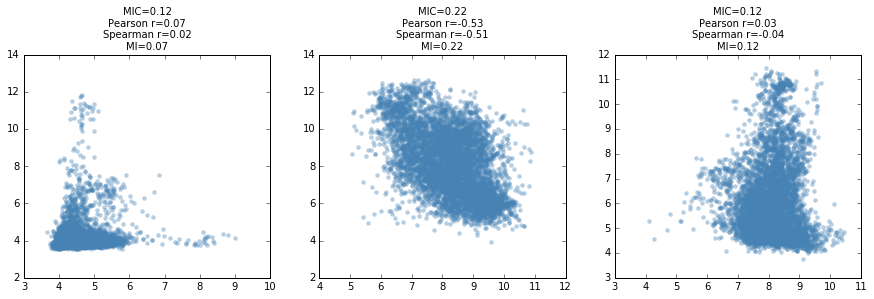

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)
ax1.scatter(rel_1["AT1G26600"], rel_1["AT2G17950"], c='steelblue', alpha=0.4, lw=0)
ax2.scatter(rel_2["AT5G61380"], rel_2["AT1G01060"],c='steelblue', alpha=0.4, lw=0)
ax3.scatter(rel_3["AT3G18990"], rel_3["AT5G10140"],c='steelblue', alpha=0.4, lw=0)
ax1.set_title('MIC=%.2f\nPearson r=%.2f\nSpearman r=%.2f\nMI=%.2f' % (rel_results.iloc[0,2],rel_results.iloc[0,3],rel_results.iloc[0,5],rel_results.iloc[0,7]),fontsize=10)
ax2.set_title('MIC=%.2f\nPearson r=%.2f\nSpearman r=%.2f\nMI=%.2f' % (rel_results.iloc[1,2],rel_results.iloc[1,3],rel_results.iloc[1,5],rel_results.iloc[1,7]),fontsize=10)
ax3.set_title('MIC=%.2f\nPearson r=%.2f\nSpearman r=%.2f\nMI=%.2f' % (rel_results.iloc[2,2],rel_results.iloc[2,3],rel_results.iloc[2,5],rel_results.iloc[2,7]),fontsize=10)
plt.show()

In [17]:
# rel_1["1/AT1G26600"]=1/rel_1["AT1G26600"]
# rel_1.head()

# plt.hist(rel_1["1/AT1G26600"], bins=50, color='steelblue', normed=True)
# plt.show()

# mine_1_2 = MINE(alpha=0.6, c=15, est="mic_approx")
# mine_1_2.compute_score(rel_1["1/AT1G26600"], rel_1["AT2G17950"])
# prsr_1_2=stats.pearsonr(rel_1["1/AT1G26600"], rel_1["AT2G17950"])
# sprm_1_2=stats.spearmanr(rel_1["1/AT1G26600"], rel_1["AT2G17950"])
# gene_1_2=rel_1["1/AT1G26600"].values.reshape((6289,1))
# gene_2=rel_1["AT2G17950"].values.reshape((6289,1)).ravel()
# mi_1_2=mutual_info_regression(gene_1_2,gene_2)

# plt.scatter(rel_1["1/AT1G26600"], rel_1["AT2G17950"], c='steelblue', alpha=0.4, lw=0)
# plt.show()

# mine_1_2.mic(),prsr_1_2[0],prsr_1_2[1],sprm_1_2[0],sprm_1_2[1],mi_1_2[0]

# mine_1.mic(),prsr_1[0],prsr_1[1],sprm_1[0],sprm_1[1],mi_1[0]